# Heart Disease Logistic Regression

In this project, we will create a logistic regression model to predict if a patient has heart disease given 12 factors. 

The data was obtained here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

The first step is to import all the required packages.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import time

### Import Data and Exploration

In this section we will import the data as well as explore it to make sure there aren't any entries that could interfere with the model's reliability. After all, providing garbage input will give us garbage output.

In [55]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df

# Check df if there are any null entries or human produced outliers

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [58]:
#Check for null entries
df.isnull().values.any()

False

In [60]:
#Check for outliers
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


It looks like there are no missing values or visible outliers. Now that we've checked the data, its time to classify our independent variables as well as our measured (dependent) variable. With this, we can check for any cross correlation between independent variables.

In [61]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

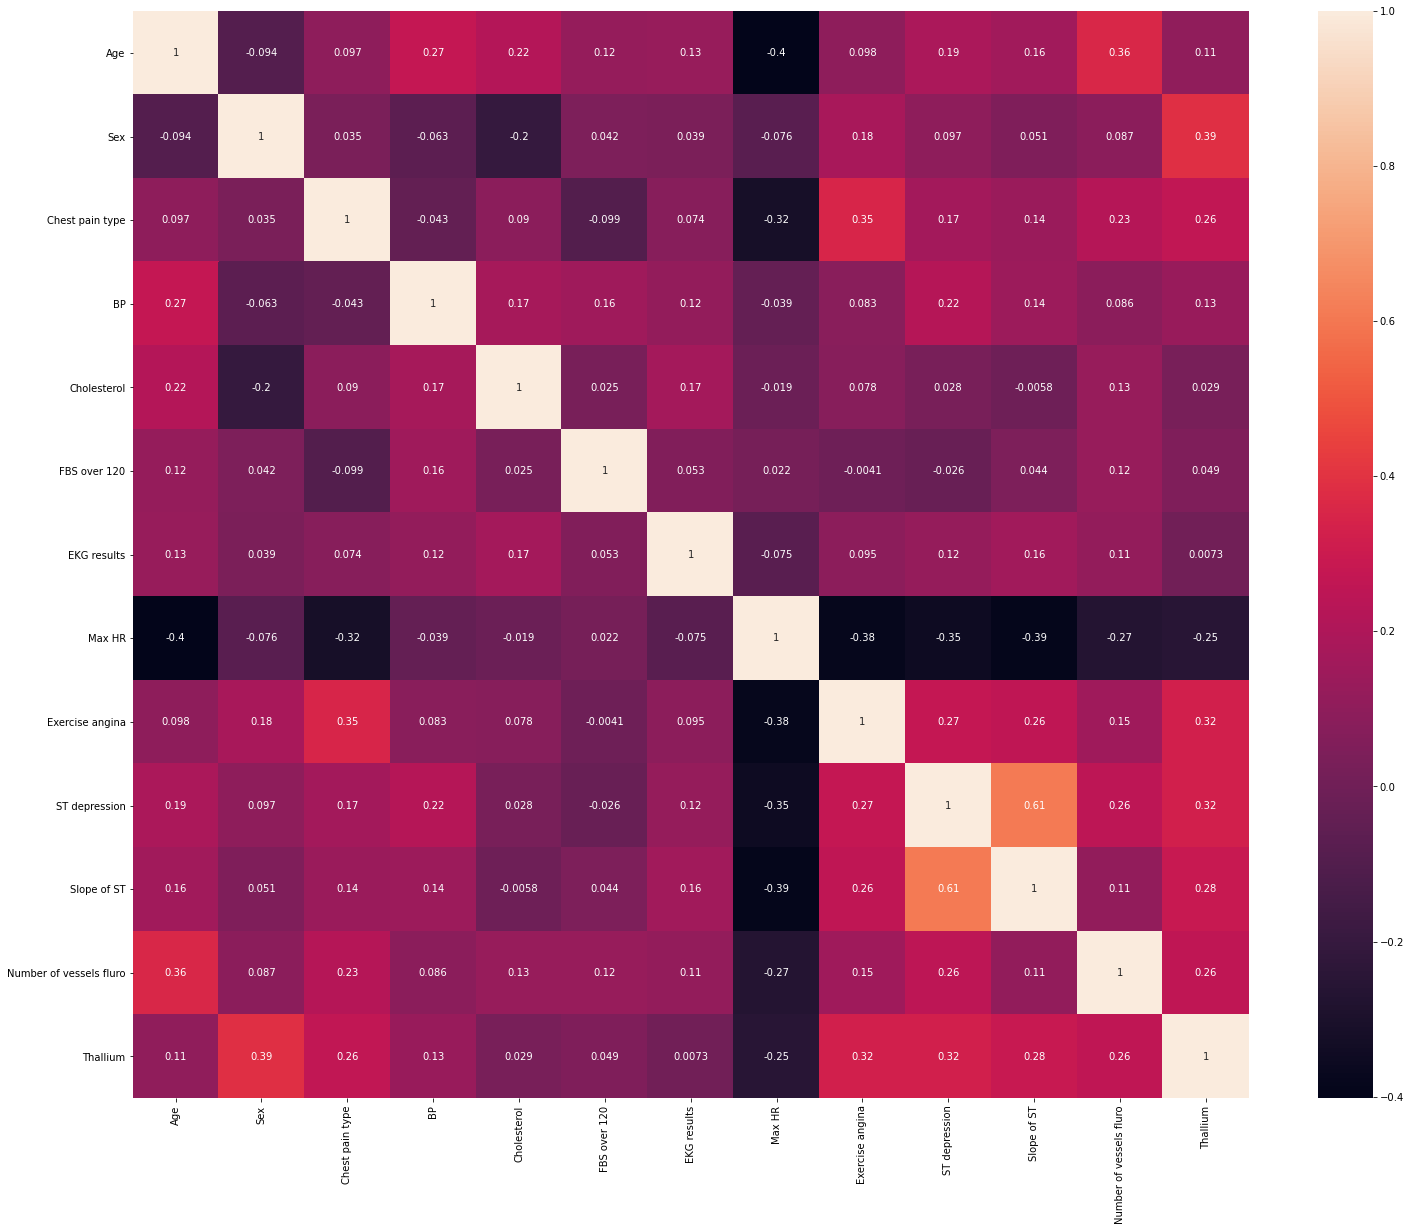

In [62]:
plt.figure(figsize = (25, 20))
sns.heatmap(X.corr(), annot = True)
pass

There doesn't seem to be much cross correlation between the independent variables other than "Slope of ST" vs "ST depression". Since this is the case, we expect the effects of variable selection to be quite minimal as the variance in the data seems to come from all the independent variables.

### Model Implementation (All Independent Variables)

Since there isn't much cross correlation between variables within our data, lets implement a logistic regression model using all the independent variables from our dataset.

Train accuracy: 0.86
Test accuracy: 0.85

 Confusion Matrix of Test


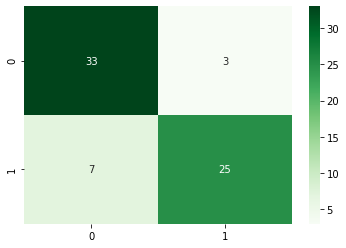

In [63]:
# Make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=5000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_true = y_test

# Measure accuracy
print("Train accuracy:", round(accuracy_score(y_train, model.predict(X_train)), 2))
print("Test accuracy:", round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
print("\n Confusion Matrix of Test")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap = "Greens")

pass

From the confusion matrix above, it's clear to see our model predicts fairly well on the test set with an accuracy 80%+. Let's replicate this 10 times using different test-train splits to see how a logistic regression model preforms generally on this dataset.

In [64]:
#Run 10 times:
trainacc = []
testacc = []
t1 = time.time()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

    
    model = LogisticRegression(max_iter=5000)

    
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    y_true = y_test
    
    trainacc.append(accuracy_score(y_train, model.predict(X_train)))
    testacc.append(accuracy_score(y_true, y_pred))
t2 = time.time()
    
print("Average Train accuracy:", round(sum(trainacc)/len(trainacc), 2))
print("Average Test accuracy:", round(sum(testacc)/len(testacc), 2))

print("Time to run 10 cycles: " + str(round((t2-t1)*1000)) +  " milliseconds")

Average Train accuracy: 0.87
Average Test accuracy: 0.82
Time to run 10 cycles: 3503 milliseconds


The findings are consistent with the accuracy of the singular test. We can reasonably expect an 80%+ accuracy with any logistic regression model fit to this data. 

### Variable Selected Logistic Regression Model

Implementing a model with 12 features can be taxing for computation as well as data storage. Lets now use Principle Component Analysis (PCA) to select enough features to explain rougly 95% of the variance within the data. PCA requires the data to be mean adjusted (subtracting the mean of independent variables to each entry). Once we scale the data in this way, we can see how many features we truly need. 

Variances (Percentage):
[23.42553084 12.36667626  9.54720004  8.92837948  7.78754038  6.98930293
  6.35298986  5.76421898  5.21241035  4.4318274   3.48854807  3.09871216
  2.60666325]


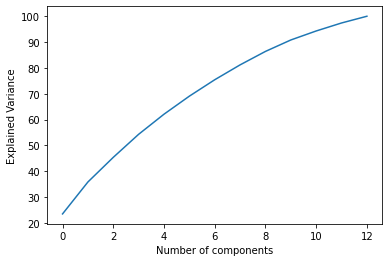

In [65]:
# Do feature scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")

pass

From the above figure, we see that roughly 95% of the variance can be explained by 10 components of the data. Lets see what the data of these 10 components look like and implent a logistic regression model using these 10 components.

In [66]:
# Do feature scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0  2.671284  1.573527 -1.031522 -0.487488  0.622460 -1.627768 -1.563591   
1  0.955444  3.468306 -1.830210  0.068183 -2.442918  1.281539 -1.029896   
2 -0.895053 -0.612315  0.428656 -0.670931  0.654462  0.811734 -0.916107   
3  2.147007 -0.918253 -1.077068 -0.883479  0.978831  0.712877  0.394241   
4  0.265049  1.879641 -1.501642 -0.290839  0.665148 -1.144449  0.286787   

          7         8         9  
0 -0.382300  0.318809  0.085041  
1 -2.128786  3.775203 -1.468759  
2  0.672214  1.463279 -0.651950  
3  0.988818  0.976093 -0.330357  
4  1.787286  1.125082  1.287985  

Size: 
(270, 10)


Train accuracy: 0.84
Test accuracy: 0.85

Test confusion_matrix


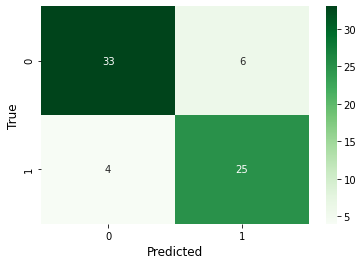

In [67]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, shuffle=True)

# Initialize the logistic regression model

PCAmodel = LogisticRegression(max_iter=2500)

# Train the model
PCAmodel.fit(X_train_pca, y_train)

# Make predictions
y_pred = PCAmodel.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, PCAmodel.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix

cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Greens')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

pass

Lets repeat this process 10 times to obtain an average test accuracy.

In [68]:
pcatrainacc = []
pcatestacc = []

t1 = time.time()
for i in range(10):
    
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, shuffle=True)

    # Initialize the logistic regression model

    PCAmodel = LogisticRegression(max_iter=2500)

    # Train the model
    PCAmodel.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = PCAmodel.predict(X_test_pca) # Predictions
    y_true = y_test # True values
    
    pcatrainacc.append(accuracy_score(y_train, PCAmodel.predict(X_train_pca)))
    pcatestacc.append(accuracy_score(y_true, y_pred))

# Measure accuracy
print("Train accuracy:", np.round(sum(pcatrainacc)/len(pcatrainacc), 2))
print("Test accuracy:", np.round(sum(pcatestacc)/len(pcatestacc), 2))

t2 = time.time()
print("Time to run 10 cycles: " + str(round((t2-t1)*1000)) +  " milliseconds")

Train accuracy: 0.85
Test accuracy: 0.85
Time to run 10 cycles: 1668 milliseconds


The above data shows that the PCA variably selected model preforms similarly to the model which uses all the variables but can be computed faster than the regular model which is appealing when considering further testing as well as the possibility of more data (larger data set) in the future. 

## Conclusion
We went from taking a large dataset to creating a PCA'ed and a non PCA'ed Logistic Regression Model. Some future directions for this project would be to include other features into the dataset or use different classification models including K-means, Random Forest, or Neural Networks. 